In [ ]:
!pip install nlp
!pip install pandas
!pip install numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
file_path = '/content/drive/My Drive/gpt-4.csv'
print(os.path.exists(file_path))

True


In [ ]:
import pandas as pd
df = pd.read_csv(file_path, on_bad_lines='skip',nrows=3000,encoding='latin1')
df.head()

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."


In [ ]:
sample = df.sample(n=1000,random_state=42)
sample

,data,conversation
1801,A 39-month-old Sri Lankan Sinhalese boy from a...,"Doctor: Good morning, what brought you to the ..."
1190,A 76-year-old man originally underwent medial ...,"Doctor: Hello, Mr. Smith. How are you feeling ..."
1817,The first patient was a 66-year-old female wit...,"Doctor: Good afternoon, how are you feeling to..."
251,"The patient was a 28-year-old woman, Gravida 2...","Doctor: Hello, how are you feeling today?\nPat..."
2505,A 61-year-old female with medical history of h...,"Doctor: Hello, how are you feeling today?\nPat..."
...,...,...
618,A 73-year-old white man presented to our emerg...,"Doctor: Good morning, Mr. Smith. What brings y..."
406,A 41-year-old gravida 6 para 3 female (uncompl...,"Doctor: Good afternoon, I'm Dr. Smith. How are..."
1157,A 50-year-old male fell and was bitten on the ...,"Doctor: Good morning, how are you feeling toda..."
1068,An 8-year-old girl was referred for investigat...,"Doctor: Good morning, how are you feeling toda..."


Importing the required **packages**

In [ ]:
import re
import matplotlib.pyplot as mb
import numpy as np
import seaborn as sns
import nltk
import spacy
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

nlp =spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!




#   **`Text Processing`**



1) **Text** **Processing**

The Clean_text Function cleans the text by removing square brackets,URLs,HTML Tags,punctuation,numbers and extra Whitespaces and coverting them into lowercases.

2) **Tokenization**

The tokenize_text function is used to split the texts into tokens (indivduals of text).

3) **StopWords removal**

The stopword_removal function will removes English stopwords like a,the,and,in etc..

4) **Parts of Speech Tagging**

POS tagging on tokens and coverts the tags to WordNet format.

5) **lemmatization**

The lemmatize_text Function will lemmatize tokens based on their POS tags using WordNetLemmatizer.

In [ ]:
!pip install dash plotly pandas

In [ ]:
def clean_text(text):
  text = text.lower() #text in lowercase
  text = re.sub(r'\[.*?\]','',text) #remove text in square brackets
  text = re.sub(r'\s+',' ',text) #remove extra spaces
  text = re.sub(r'\w*\d\w*','',text) #remove words containing numbers
  text = re.sub(r'\n','',text) #remove newlines
  text = re.sub(r'[%s]' % re.escape(string.punctuation),'',text) #remove punctuation
  text = re.sub(r'<.*?>+','',text) #remove html tags
  return text

def tokenize_text(text):
  return word_tokenize(text)

def stopwords_removal(text):
  stop_words = set(stopwords.words('english'))
  return [word for word in text if word not in stop_words]

def pos_tagging(text):
  return nltk.pos_tag(text)

def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word) for word in text]

In [ ]:
def preprocess_text(text):
  text = clean_text(text)
  tokens = tokenize_text(text)
  tokens = stopwords_removal(tokens)
  tokens = lemmatize_text(tokens)
  return ' '.join(tokens)

sample['preprocessed_text'] = ""
sample['preprocessed_text'] = sample['conversation'].astype(str).apply(preprocess_text)
sample

,data,conversation,preprocessed_text
1801,A 39-month-old Sri Lankan Sinhalese boy from a...,"Doctor: Good morning, what brought you to the ...",doctor good morning brought hospital today pat...
1190,A 76-year-old man originally underwent medial ...,"Doctor: Hello, Mr. Smith. How are you feeling ...",doctor hello mr smith feeling today patient im...
1817,The first patient was a 66-year-old female wit...,"Doctor: Good afternoon, how are you feeling to...",doctor good afternoon feeling today patient go...
251,"The patient was a 28-year-old woman, Gravida 2...","Doctor: Hello, how are you feeling today?\nPat...",doctor hello feeling today patient im feeling ...
2505,A 61-year-old female with medical history of h...,"Doctor: Hello, how are you feeling today?\nPat...",doctor hello feeling today patient hmm good do...
...,...,...,...
618,A 73-year-old white man presented to our emerg...,"Doctor: Good morning, Mr. Smith. What brings y...",doctor good morning mr smith brings hospital t...
406,A 41-year-old gravida 6 para 3 female (uncompl...,"Doctor: Good afternoon, I'm Dr. Smith. How are...",doctor good afternoon im dr smith feeling toda...
1157,A 50-year-old male fell and was bitten on the ...,"Doctor: Good morning, how are you feeling toda...",doctor good morning feeling today patient im o...
1068,An 8-year-old girl was referred for investigat...,"Doctor: Good morning, how are you feeling toda...",doctor good morning feeling today patient im f...


In [ ]:
#calculating term frequencies
tf_data= sample["data"].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_data.columns = ["word","tf"]
tf_data.sort_values("tf",ascending=False)

In [ ]:
tf_convo= sample["preprocessed_text"].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_convo.columns = ["word","tf"]
tf_convo.sort_values("tf",ascending=False)

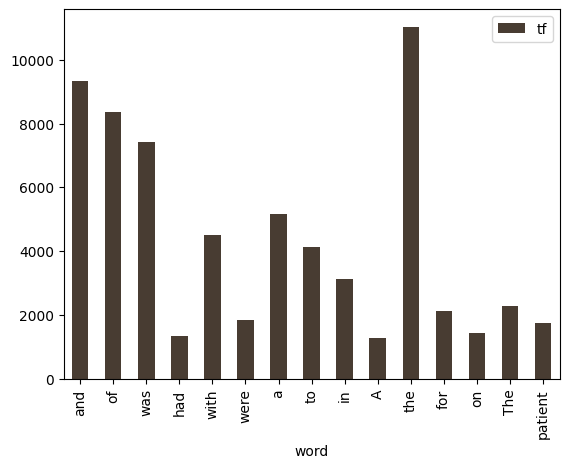

In [ ]:
tf_data[tf_data["tf"] > 1200].plot.bar(x="word",y="tf",color="#483C32")
mb.show()

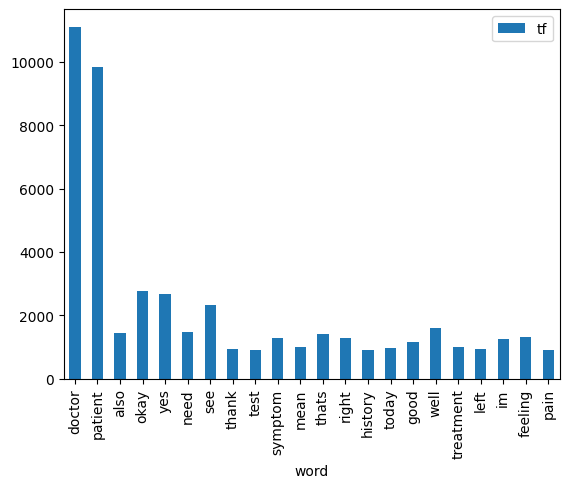

In [ ]:
#Barplot for conversation
tf_convo[tf_convo["tf"] > 900].plot.bar(x="word",y="tf")
mb.show()

In [ ]:
#separating doctor patient dialogue for conversation
def separte_convo(conversation):
  if isinstance(conversation, str): # Check if conversation is a string
    doctor_dia = []
    patient_dia =[]
    lines = conversation.split("\n")
    for line in lines:
      if line.startswith("Doctor:"):
        doctor_dia.append(line.replace("Doctor:","").strip())
      elif line.startswith("Patient:"):
        patient_dia.append(line.replace("Patient:","").strip())
    return " ".join(doctor_dia), " ".join(patient_dia)
  else:
    return "", "" # Return empty strings for non-string values

sample[['doctor_conversation','patient_conversation']] = sample['conversation'].apply(lambda x: pd.Series(separte_convo(x)))
sample.head()

,data,conversation,preprocessed_text,doctor_conversation,patient_conversation
1801,A 39-month-old Sri Lankan Sinhalese boy from a...,"Doctor: Good morning, what brought you to the ...",doctor good morning brought hospital today pat...,"Good morning, what brought you to the hospital...","I presented with circulatory collapse. No, I d..."
1190,A 76-year-old man originally underwent medial ...,"Doctor: Hello, Mr. Smith. How are you feeling ...",doctor hello mr smith feeling today patient im...,"Hello, Mr. Smith. How are you feeling today? I...","I'm okay, Doctor. Just a bit tired. Yes, that'..."
1817,The first patient was a 66-year-old female wit...,"Doctor: Good afternoon, how are you feeling to...",doctor good afternoon feeling today patient go...,"Good afternoon, how are you feeling today? I s...","Not so good, I've been having chest pain and d..."
251,"The patient was a 28-year-old woman, Gravida 2...","Doctor: Hello, how are you feeling today?\nPat...",doctor hello feeling today patient im feeling ...,"Hello, how are you feeling today? Okay. Can yo...","I'm not feeling well, doctor. I have been havi..."
2505,A 61-year-old female with medical history of h...,"Doctor: Hello, how are you feeling today?\nPat...",doctor hello feeling today patient hmm good do...,"Hello, how are you feeling today? Can you tell...","Hmm, not too good. Yes, I've been having troub..."


Applying **SentimentIntensityAnalyzer** for the data








In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sis = SentimentIntensityAnalyzer()

sample["polarity_doctor_convo"] = sample["doctor_conversation"].apply(lambda x: sis.polarity_scores(x)["compound"])
sample["polarity_patient_convo"] = sample["patient_conversation"].apply(lambda x: sis.polarity_scores(x)["compound"])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sample["doctor_conversation"]

,doctor_conversation
1801,"Good morning, what brought you to the hospital..."
1190,"Hello, Mr. Smith. How are you feeling today? I..."
1817,"Good afternoon, how are you feeling today? I s..."
251,"Hello, how are you feeling today? Okay. Can yo..."
2505,"Hello, how are you feeling today? Can you tell..."
...,...
618,"Good morning, Mr. Smith. What brings you to th..."
406,"Good afternoon, I'm Dr. Smith. How are you fee..."
1157,"Good morning, how are you feeling today? I see..."
1068,"Good morning, how are you feeling today? So, y..."


In [ ]:
sample["patient_conversation"]

,patient_conversation
1801,"I presented with circulatory collapse. No, I d..."
1190,"I'm okay, Doctor. Just a bit tired. Yes, that'..."
1817,"Not so good, I've been having chest pain and d..."
251,"I'm not feeling well, doctor. I have been havi..."
2505,"Hmm, not too good. Yes, I've been having troub..."
...,...
618,I have been experiencing left lower extremity ...
406,"Hi, I'm feeling okay, just a bit nervous. I've..."
1157,"I'm okay, a bit sore. Yeah, I was out riding a..."
1068,"I'm feeling okay, thank you. Yes, that's right..."


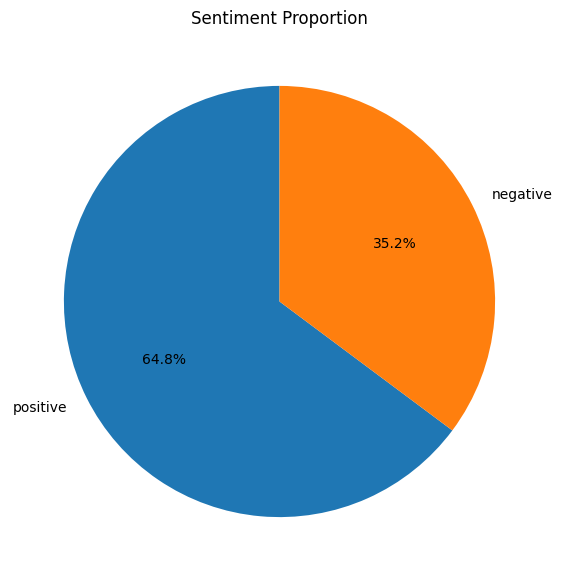

In [ ]:
sample["sentiment_label_patient"] = sample["polarity_patient_convo"].apply(lambda x: "positive" if x > 0 else "negative")
sample["sentiment_label_patient"].value_counts()
sentiment_count = sample["sentiment_label_patient"].value_counts()
mb.figure(figsize=(7,7))
mb.pie(sentiment_count,labels=sentiment_count.index,autopct="%1.1f%%",startangle=90)
mb.title("Sentiment Proportion")
mb.show()

In [ ]:
from collections import Counter
import re

# Sample of common disease names for extraction (extendable)
common_diseases = [
    'COVID-19', 'diabetes', 'hypertension', 'cancer', 'tuberculosis',
    'asthma', 'stroke', 'malaria', 'influenza', 'hepatitis', 'arthritis',
    'pneumonia', 'HIV', 'Alzheimer', 'Parkinson', 'dengue', 'cholera',
    'epilepsy', 'leukemia', 'depression', 'anxiety', 'migraine', 'eczema',
    'osteoporosis', 'anemia', 'gout', 'obesity', 'cirrhosis', 'bronchitis',
    'lymphoma', 'psoriasis', 'meningitis', 'sinusitis', 'fibromyalgia',
    'sclerosis', 'ulcer', 'glaucoma', 'sepsis', 'schizophrenia', 'bipolar disorder',
    'autism', 'Down syndrome', 'lupus', 'sarcoidosis', 'tetanus', 'rabies',
    'measles', 'mumps', 'rubella', 'pertussis', 'diphtheria', 'polio',
    'smallpox', 'Ebola', 'Zika virus', 'yellow fever', 'encephalitis',
    'lyme disease', 'tinnitus', 'vertigo', 'vitiligo', 'scabies', 'ringworm',
    'conjunctivitis', 'keratitis', 'otitis', 'colitis', 'IBS', 'Celiac disease',
    'Crohn’s disease', 'diverticulitis', 'pancreatitis', 'renal failure',
    'urinary tract infection', 'prostatitis', 'endometriosis', 'fibroid',
    'cystitis', 'infertility', 'ovarian cyst', 'PCOS', 'impetigo',
    'cellulitis', 'gangrene', 'necrosis', 'alopecia', 'sickle cell anemia',
    'thalassemia', 'hemophilia', 'varicose veins', 'hemorrhoids',
    'carpal tunnel syndrome', 'tendinitis', 'plantar fasciitis',
    'herniated disc', 'sciatica', 'Bell’s palsy', 'Guillain-Barre syndrome',
    'myasthenia gravis', 'dystonia', 'sleep apnea'
]

In [ ]:
#function to extract diseases from text using a predefined list
def extract_diseases(text,dis_list):
  found_diseases = []
  for disease in dis_list:
    if re.search(rf'\b{re.escape(disease)}\b', text, re.IGNORECASE):
      found_diseases.append(disease)
  return found_diseases

sample['extracted_diseases'] = sample['data'].apply(lambda x: extract_diseases(str(x),common_diseases))
sample

,data,conversation,preprocessed_text,doctor_conversation,patient_conversation,polarity_doctor_convo,polarity_patient_convo,sentiment_label_patient,extracted_diseases
1801,A 39-month-old Sri Lankan Sinhalese boy from a...,"Doctor: Good morning, what brought you to the ...",doctor good morning brought hospital today pat...,"Good morning, what brought you to the hospital...","I presented with circulatory collapse. No, I d...",0.7319,-0.8661,negative,[sepsis]
1190,A 76-year-old man originally underwent medial ...,"Doctor: Hello, Mr. Smith. How are you feeling ...",doctor hello mr smith feeling today patient im...,"Hello, Mr. Smith. How are you feeling today? I...","I'm okay, Doctor. Just a bit tired. Yes, that'...",-0.6391,0.9548,positive,"[diabetes, cancer, hepatitis]"
1817,The first patient was a 66-year-old female wit...,"Doctor: Good afternoon, how are you feeling to...",doctor good afternoon feeling today patient go...,"Good afternoon, how are you feeling today? I s...","Not so good, I've been having chest pain and d...",0.9173,-0.8942,negative,[]
251,"The patient was a 28-year-old woman, Gravida 2...","Doctor: Hello, how are you feeling today?\nPat...",doctor hello feeling today patient im feeling ...,"Hello, how are you feeling today? Okay. Can yo...","I'm not feeling well, doctor. I have been havi...",0.9796,0.7117,positive,[]
2505,A 61-year-old female with medical history of h...,"Doctor: Hello, how are you feeling today?\nPat...",doctor hello feeling today patient hmm good do...,"Hello, how are you feeling today? Can you tell...","Hmm, not too good. Yes, I've been having troub...",0.6662,-0.8637,negative,"[diabetes, hypertension, stroke, pneumonia]"
...,...,...,...,...,...,...,...,...,...
618,A 73-year-old white man presented to our emerg...,"Doctor: Good morning, Mr. Smith. What brings y...",doctor good morning mr smith brings hospital t...,"Good morning, Mr. Smith. What brings you to th...",I have been experiencing left lower extremity ...,0.4939,0.4329,positive,[stroke]
406,A 41-year-old gravida 6 para 3 female (uncompl...,"Doctor: Good afternoon, I'm Dr. Smith. How are...",doctor good afternoon im dr smith feeling toda...,"Good afternoon, I'm Dr. Smith. How are you fee...","Hi, I'm feeling okay, just a bit nervous. I've...",0.9770,-0.6743,negative,[]
1157,A 50-year-old male fell and was bitten on the ...,"Doctor: Good morning, how are you feeling toda...",doctor good morning feeling today patient im o...,"Good morning, how are you feeling today? I see...","I'm okay, a bit sore. Yeah, I was out riding a...",0.9696,0.8442,positive,[]
1068,An 8-year-old girl was referred for investigat...,"Doctor: Good morning, how are you feeling toda...",doctor good morning feeling today patient im f...,"Good morning, how are you feeling today? So, y...","I'm feeling okay, thank you. Yes, that's right...",0.6217,0.9876,positive,[asthma]


In [ ]:
all_diseases = [diseases for diseases in sample['extracted_diseases'] for diseases in diseases]
disease_count = Counter(all_diseases)
Most_repeated_diseases = disease_count.most_common(10)
print("The Top 10 Most Repeated diseases are:")
for disease,count in Most_repeated_diseases:
  print(f"{disease}: {count} occurences")

The Top 10 Most Repeated diseases are:
hypertension: 132 occurences
diabetes: 105 occurences
cancer: 91 occurences
anemia: 49 occurences
pneumonia: 45 occurences
hepatitis: 44 occurences
necrosis: 35 occurences
HIV: 33 occurences
tuberculosis: 28 occurences
obesity: 25 occurences


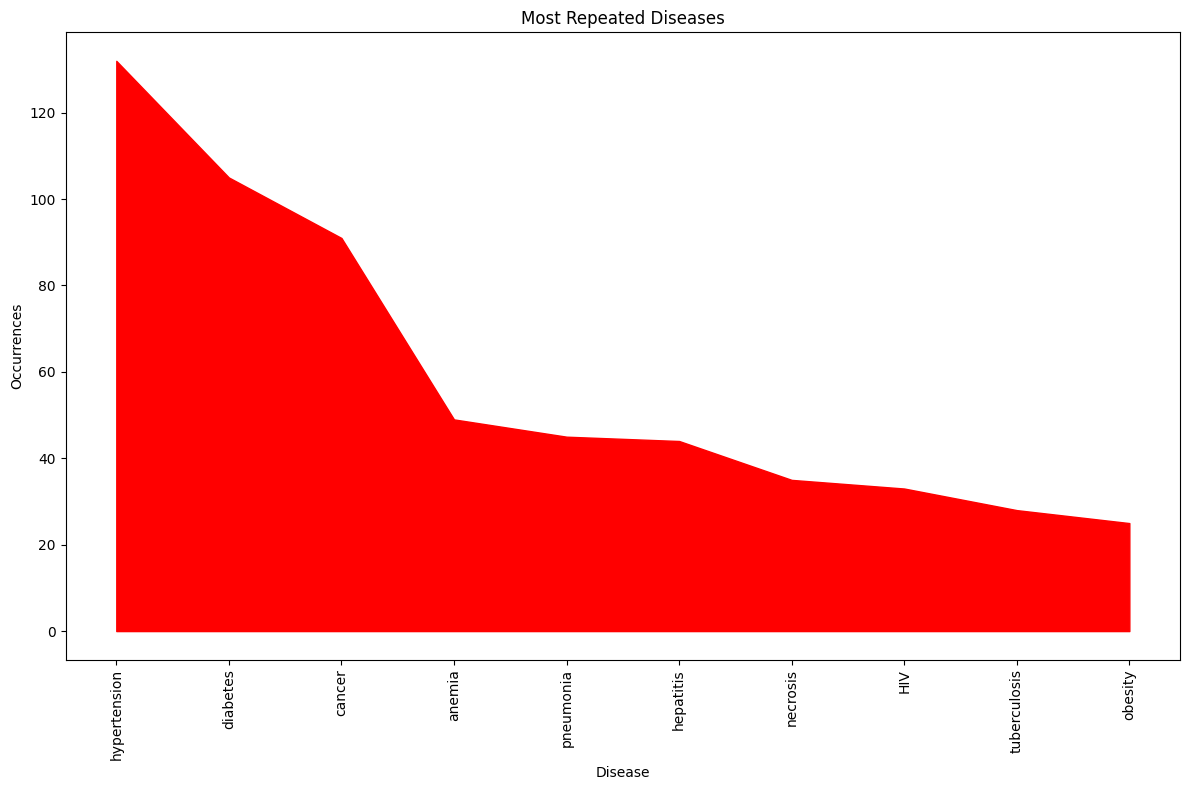

In [ ]:
disease_counts = Most_repeated_diseases
mb.figure(figsize=(12,8))
disease_labels = [disease for disease, count in disease_counts]
count_values = [count for disease, count in disease_counts]
x_values = range(len(disease_labels))

mb.fill_between(x_values, count_values, color = "Red")
mb.title("Most Repeated Diseases")
mb.xticks(x_values, disease_labels, rotation='vertical')
mb.xlabel("Disease")
mb.ylabel("Occurrences")
mb.tight_layout()
mb.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display


def plot_disease_occurrences(top_n=10):
    """Plots the occurrences of the top N diseases using matplotlib."""

    # Get the top_n most frequent diseases
    top_diseases = disease_count.most_common(top_n)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 8))
    disease_labels = [disease for disease, count in top_diseases]
    count_values = [count for disease, count in top_diseases]
    x_values = range(len(disease_labels))

    plt.bar(x_values, count_values, color="#97D9E1")  # Use bar plot for better visualization
    plt.title(f"Top {top_n} Most Repeated Diseases")
    plt.xticks(x_values, disease_labels, rotation='vertical')
    plt.xlabel("Disease")
    plt.ylabel("Occurrences")
    plt.tight_layout()
    plt.show()


# Create a slider widget
top_n_slider = widgets.IntSlider(
    value=10,
    min=1,
    max=len(disease_count),
    step=1,
    description='Top N Diseases:',
    continuous_update=False
)

output = widgets.Output()

def on_slider_change(change):
    with output:
        output.clear_output(wait=True)
        plot_disease_occurrences(change.new)

top_n_slider.observe(on_slider_change, names='value')

# Display the slider and the output
display(top_n_slider, output)

IntSlider(value=10, continuous_update=False, description='Top N Diseases:', max=73, min=1)

Output()